# Which successful athletes (Team GB and non-GB) can we use to market sports to different generations?

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_olympics_dataset.csv")

In [8]:
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,51139,GEORGES DAVIEL DE LA NZIRE,M,17,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,ATHLETICS,ATHLETICS MEN'S 800 METRES,NONE
1,33940,EUGNE HENRI CALLOT,M,20,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,FENCING,"FENCING MEN'S FOIL, INDIVIDUAL",SILVER
2,51201,HENRI DE LABORDE,M,25,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,FENCING,"FENCING MEN'S FOIL, INDIVIDUAL",NONE
3,52537,J. DEFERT,M,25,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,TENNIS,TENNIS MEN'S SINGLES,NONE
4,63068,LAUNCESTON ELLIOT,M,21,GREAT BRITAIN,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,ATHLETICS,ATHLETICS MEN'S 100 METRES,NONE


In [9]:
gbr_df = df.copy()
gbr_df = df[(df['Country'] == 'GREAT BRITAIN')] # filtering to only include Team GB
gbr_medals_all = gbr_df[gbr_df['Medal'] != 'NONE'] # filtering df to only include medallists

In [10]:
world_df = df.copy()
world_medals_all = world_df[world_df['Medal'] != 'NONE']

## Medals by Athlete
* The most decorated Olympian in British history is Jason Kenny
* This is followed by Duncan Scott, Bradley Wiggins, Adam Peaty, James Guy and Chris Hoy
* The most decorated female Olympian in Team GB is Rebecca Adlington

### Great Britain

In [13]:
all_medals = gbr_medals_all.groupby('Name')['Medal'].count().reset_index()
sort_gbr_medals = all_medals.sort_values(by='Medal', ascending=False)
top_gbr_medals = sort_gbr_medals.head(20)

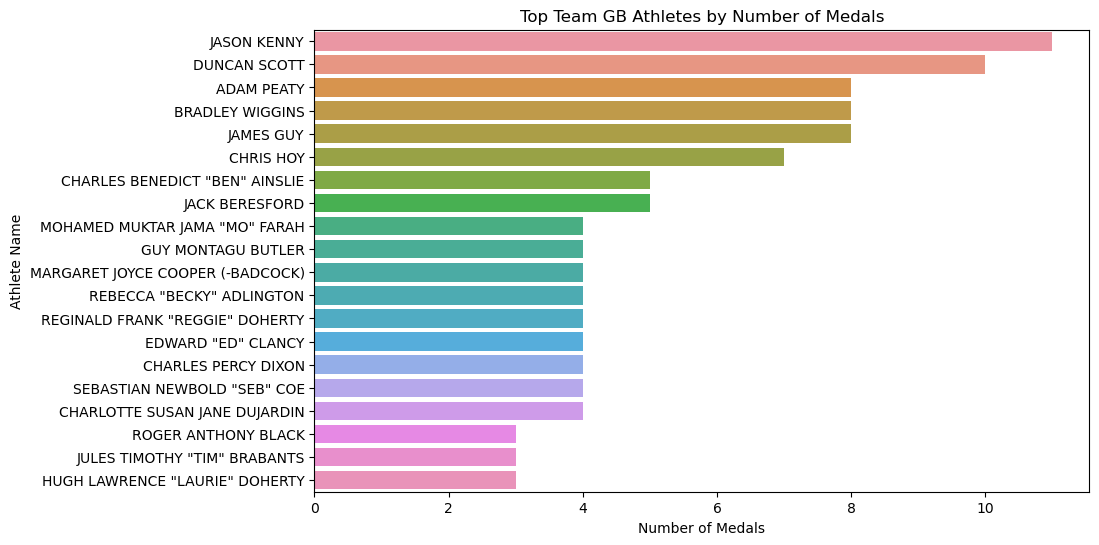

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Medal', y='Name', data=top_gbr_medals)
plt.title('Top Team GB Athletes by Number of Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Athlete Name')

plt.show()

In [15]:
gbr_medals = gbr_medals_all.groupby(['Name', 'Sport'])['Medal'].count().reset_index()
sort_gbr = gbr_medals.sort_values(by='Medal', ascending=False)
top_gbr = sort_gbr.head(20)

print(top_gbr)

                                 Name       Sport  Medal
137                      DUNCAN SCOTT    SWIMMING     10
286                       JASON KENNY     CYCLING      9
0                          ADAM PEATY    SWIMMING      8
278                         JAMES GUY    SWIMMING      8
54                    BRADLEY WIGGINS     CYCLING      8
90                          CHRIS HOY     CYCLING      7
264                    JACK BERESFORD      ROWING      5
65     CHARLES BENEDICT "BEN" AINSLIE     SAILING      5
518       SEBASTIAN NEWBOLD "SEB" COE   ATHLETICS      4
143                EDWARD "ED" CLANCY     CYCLING      4
76                CHARLES PERCY DIXON      TENNIS      4
472   REGINALD FRANK "REGGIE" DOHERTY      TENNIS      4
469         REBECCA "BECKY" ADLINGTON    SWIMMING      4
406  MARGARET JOYCE COOPER (-BADCOCK)    SWIMMING      4
85      CHARLOTTE SUSAN JANE DUJARDIN  EQUESTRIAN      4
425    MOHAMED MUKTAR JAMA "MO" FARAH   ATHLETICS      4
225                GUY MONTAGU 

#### Top Athlete by Number of Gold Medals

In [17]:
gbr_medals_gold = gbr_df[gbr_df['Medal'] == 'GOLD']

In [18]:
gold_medals = gbr_medals_gold.groupby('Name')['Medal'].count().reset_index()
sort_gbr_medals_gold = gold_medals.sort_values(by='Medal', ascending=False)
top_gbr_medals_gold = sort_gbr_medals_gold.head(20)

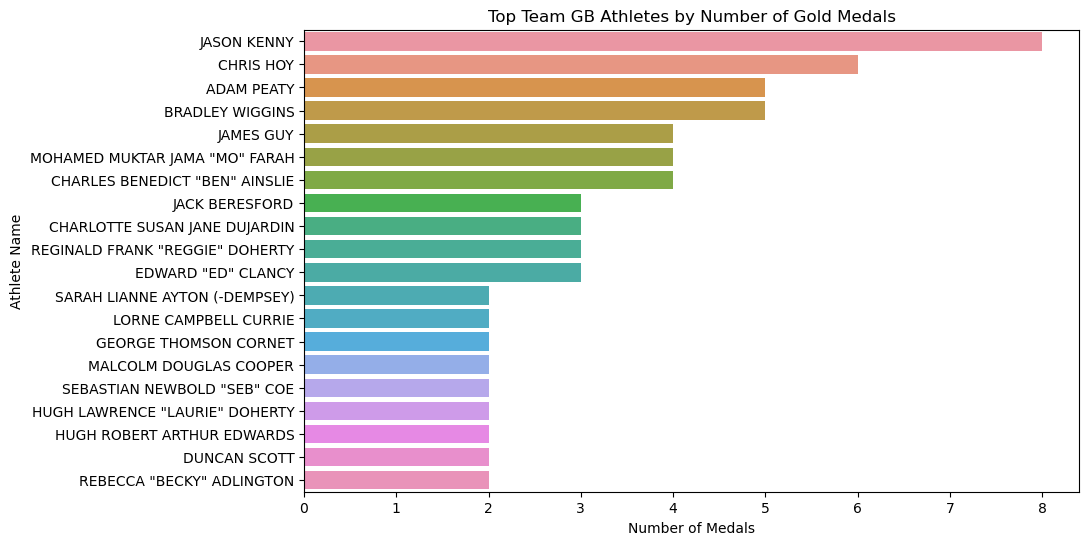

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Medal', y='Name', data=top_gbr_medals_gold)
plt.title('Top Team GB Athletes by Number of Gold Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Athlete Name')

plt.show()

### International Athletes
* Michael Phelps is the most decorated Olympic athlete of all time
* The top female athlete is Stefania Belmondo



In [21]:
all_world_medals = world_medals_all.groupby('Name')['Medal'].count().reset_index()
sort_world_medals = all_world_medals.sort_values(by='Medal', ascending=False)
top_world_medals = sort_world_medals.head(20)

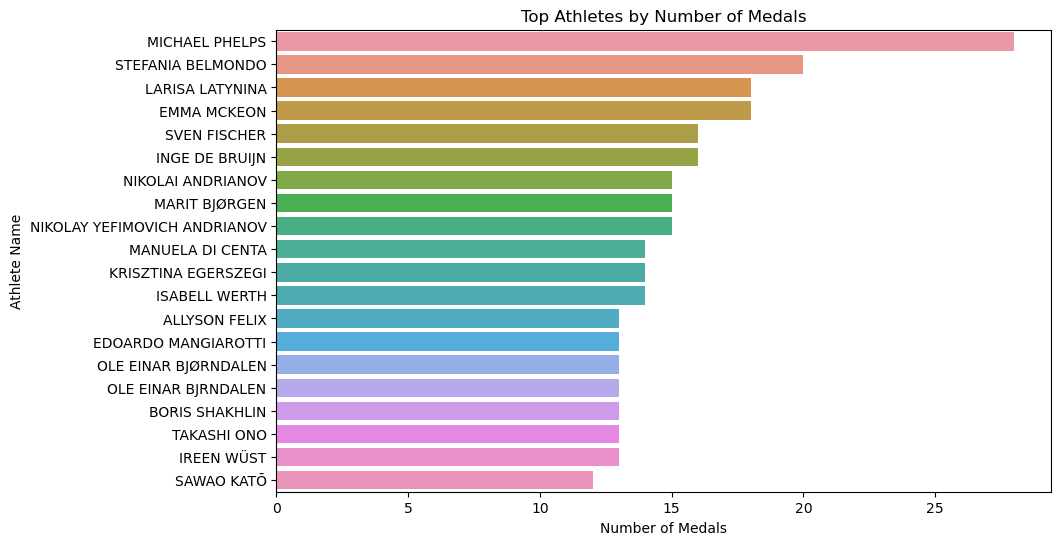

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Medal', y='Name', data=top_world_medals)
plt.title('Top Athletes by Number of Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Athlete Name')

plt.show()

In [23]:
world_medals = world_medals_all.groupby(['Name', 'Sport'])['Medal'].count().reset_index()
sort_world = world_medals.sort_values(by='Medal', ascending=False)
top_world = sort_world.head(20)

print(top_world)

                              Name                 Sport  Medal
6201                MICHAEL PHELPS              SWIMMING     28
5239               LARISA LATYNINA            GYMNASTICS     18
2505                   EMMA MCKEON              SWIMMING     18
8198                  SVEN FISCHER              BIATHLON     16
3872                INGE DE BRUIJN              SWIMMING     16
6637             NIKOLAI ANDRIANOV            GYMNASTICS     15
5889                 MARIT BJØRGEN  CROSS-COUNTRY SKIING     15
6654  NIKOLAY YEFIMOVICH ANDRIANOV            GYMNASTICS     15
5172           KRISZTINA EGERSZEGI              SWIMMING     14
3942                 ISABELL WERTH            EQUESTRIAN     14
6729           OLE EINAR BJRNDALEN              BIATHLON     13
2328           EDOARDO MANGIAROTTI               FENCING     13
6730          OLE EINAR BJØRNDALEN              BIATHLON     13
8264                   TAKASHI ONO            GYMNASTICS     13
416                  ALLYSON FELIX      

### Top Athletes in Top Team GB Sports
* By looking at the top sports for Team  answered previously in Jupyter notebook RQ1, we can find other athletes that may appeal to our consumers
* **Allyson Felix** has the top number of medals for Athletics
* **Michael Phelps** has the most medals in Swimming
* **Elisabeta Lipă** has the most medals in Rowing
* **Eva Roma Maria de Goede** has the most medals in Hockey
* **Jason Kenny** has the highest number of medals in Cycling

#### Athletics

In [30]:
athletics_df = world_medals_all[world_medals_all['Sport'] == 'ATHLETICS']
athletics_medals = athletics_df.groupby('Name')['Medal'].count()

top_athletics = athletics_medals.idxmax()
max_athletics = athletics_medals.max()

print(f"The individual with the most medals in athletics is {top_athletics} with {max_athletics} medals.")

The individual with the most medals in athletics is ALLYSON FELIX with 13 medals.


#### Swimming

In [34]:
swimming_df = world_medals_all[world_medals_all['Sport'] == 'SWIMMING']
swimming_medals = swimming_df.groupby('Name')['Medal'].count()

top_swimming = swimming_medals.idxmax()
max_swimming = swimming_medals.max()

print(f"The individual with the most medals in swimming is {top_swimming} with {max_swimming} medals.")

The individual with the most medals in swimming is MICHAEL PHELPS with 28 medals.


#### Rowing

In [36]:
rowing_df = world_medals_all[world_medals_all['Sport'] == 'ROWING']
rowing_medals = rowing_df.groupby('Name')['Medal'].count()

top_rowing = rowing_medals.idxmax()
max_rowing = rowing_medals.max()

print(f"The individual with the most medals in rowing is {top_rowing} with {max_rowing} medals.")

The individual with the most medals in rowing is ELISABETA LIPĂ with 8 medals.


#### Hockey

In [42]:
hockey_df = world_medals_all[world_medals_all['Sport'] == 'HOCKEY']
hockey_medals = hockey_df.groupby('Name')['Medal'].count()

top_hockey = hockey_medals.idxmax()
max_hockey = hockey_medals.max()

print(f"The individual with the most medals in hockey is {top_hockey} with {max_hockey} medals.")

The individual with the most medals in hockey is EVA ROMA MARIA DE GOEDE with 4 medals.


#### Cycling

In [45]:
cycling_df = world_medals_all[world_medals_all['Sport'] == 'CYCLING']
cycling_medals = cycling_df.groupby('Name')['Medal'].count()

top_cycling = cycling_medals.idxmax()
max_cycling = cycling_medals.max()

print(f"The individual with the most medals in cycling is {top_cycling} with {max_cycling} medals.")

The individual with the most medals in cycling is JASON KENNY with 9 medals.


In [46]:
# checking to see the next non-Team GB top cyclist

sorted_cycling_medals = cycling_medals.sort_values(ascending=False)
top_five_cyclists = sorted_cycling_medals.head(5)
top_five_cyclists

Name
JASON KENNY             9
BRADLEY WIGGINS         8
CHRIS HOY               7
BURTON CECIL DOWNING    6
JENS FIEDLER            5
Name: Medal, dtype: int64

## Different Athletes for Different Generations
* New data frames can be created for each distinct generation to find athletes that achieved success in particular years
* This can give an indication as to which athletes may appeal to different generations

#### Generation Alpha: 2013-Present
* Emma McKeon, Andrew de Grasse, Caeleb Dressel and Penny Oleksiak

In [49]:
filter_2013_2020 = world_medals_all[(world_medals_all['Year'] >= 2013) & (world_medals_all['Year'] <= 2020)] #filter dataframe

medal_2013_2020 = filter_2013_2020.groupby('Name')['Medal'].count().reset_index() # group athletes and count
success_2013_2020 = medal_2013_2020.sort_values(by='Medal', ascending=False) # sort

print(success_2013_2020.head(10))

                 Name  Medal
734       EMMA MCKEON     18
187   ANDRE DE GRASSE     12
395    CAELEB DRESSEL     12
2051   PENNY OLEKSIAK     10
1524  LISA CARRINGTON     10
666      DUNCAN SCOTT     10
2338     SIMONE BILES      9
2190      RYAN MURPHY      9
1435    KYLE CHALMERS      9
1331    KATIE LEDECKY      9


#### Generation Z: 1997-2012
* Michael Phelps, Inge de Bruijn, Sven Fischer and Natalie Coughlin

In [50]:
filter_1997_2012 = world_medals_all[(world_medals_all['Year'] >= 1997) & (world_medals_all['Year'] <= 2012)]

medal_1997_2012 =filter_1997_2012.groupby('Name')['Medal'].count().reset_index()
success_1997_2012 = medal_1997_2012.sort_values(by='Medal', ascending=False)

print(success_1997_2012.head(10))

                               Name  Medal
1189                 MICHAEL PHELPS     22
753                  INGE DE BRUIJN     16
1581                   SVEN FISCHER     12
1248  NATALIE ANNE COUGHLIN (-HALL)     12
1249               NATALIE COUGHLIN     12
1308            OLE EINAR BJRNDALEN     11
1453                    RYAN LOCHTE     11
1309           OLE EINAR BJØRNDALEN     11
1547              STEFANIA BELMONDO     10
1010                   LEISEL JONES      9


#### Generation Y: 1996-1981
* Kristztina Egerszegi, Manuela di Centa, Matt Biondi and Vitali Scherba

In [111]:
filter_1981_1996 = world_medals_all[(world_medals_all['Year'] >= 1981) & (world_medals_all['Year'] <= 1996)]

medal_1981_1996 = filter_1981_1996.groupby('Name')['Medal'].count().reset_index()
success_1981_1996 = medal_1981_1996.sort_values(by='Medal', ascending=False)

print(success_1981_1996.head(10))

                                Name  Medal
785              KRISZTINA EGERSZEGI     14
856                 MANUELA DI CENTA     12
908                      MATT BIONDI     11
913   MATTHEW NICHOLAS "MATT" BIONDI     11
1365                 VITALI SHCHERBA     10
1230               STEFANIA BELMONDO     10
222                       CARL LEWIS     10
847                  LYUBOV YEGOROVA      9
27                   ALEKSANDR POPOV      8
186                     BJØRN DÆHLIE      8


#### Generation X: 1965-1980
* Nikolai Andiranov, Sawao Katō, Mark Spitz and Alexander Dityatin

In [54]:
filter_1965_1980 = world_medals_all[(world_medals_all['Year'] >= 1965) & (world_medals_all['Year'] <= 1980)]

medal_1965_1980 = filter_1965_1980.groupby('Name')['Medal'].count().reset_index()
success_1965_1980 = medal_1965_1980.sort_values(by='Medal', ascending=False)

print(success_1965_1980.head(10))

                                Name  Medal
669                NIKOLAI ANDRIANOV     15
674     NIKOLAY YEFIMOVICH ANDRIANOV     15
817                       SAWAO KATŌ     12
591                       MARK SPITZ     11
34                ALEXANDER DITYATIN     10
25   ALEKSANDR NIKOLAYEVICH DITYATIN     10
8                   AKINORI NAKAYAMA     10
654    NADIA ELENA COMNECI (-CONNER)      9
626                  MIKHAIL VORONIN      9
835        SHIRLEY FRANCES BABASHOFF      9


#### Baby Boomers: 1946-1964
* Larisa Latynina, Takashi Ono, Boris Shakhlin and Edoardo Mangiarotti

In [56]:
filter_1946_1964 = world_medals_all[(world_medals_all['Year'] >= 1946) & (world_medals_all['Year'] <= 1964)]

medal_1946_1964 = filter_1946_1964.groupby('Name')['Medal'].count().reset_index()
success_1946_1964 = medal_1946_1964.sort_values(by='Medal', ascending=False)

print(success_1946_1964.head(10))

                             Name  Medal
588               LARISA LATYNINA     18
912                   TAKASHI ONO     13
116                BORIS SHAKHLIN     13
218           EDOARDO MANGIAROTTI     12
961               VIKTOR CHUKARIN     11
964     VIKTOR IVANOVYCH CHUKARIN     11
1058                 ÁGNES KELETI     10
767              POLINA ASTAKHOVA     10
768   POLINA HRYHORIVNA ASTAKHOVA     10
1041                   YURI TITOV      9


#### Silent Generation: 1928-1946
* Giulio Gaudini, Gustavo Marzi, Eugen Mack and Heikki Savolainen

In [59]:
filter_1925_1946 = world_medals_all[(world_medals_all['Year'] >= 1928) & (world_medals_all['Year'] <= 1946)] 

medals_1925_1946 = filter_1925_1946.groupby('Name')['Medal'].count().reset_index()
success_1925_1946 = medals_1925_1946.sort_values(by='Medal', ascending=False)

print(success_1925_1946.head(10))

                                      Name  Medal
215                         GIULIO GAUDINI      9
149                             EUGEN MACK      8
198                           GEORGES MIEZ      7
235                          GUSTAVO MARZI      7
290       IVAR EUGEN BALLANGRUD (ERIKSEN-)      7
289                        IVAR BALLANGRUD      7
258                      HEIKKI SAVOLAINEN      6
452             PHILIP ARON "PHIL" EDWARDS      5
203  GIANCARLO CORNAGGIA-MEDICI PETERBELLI      5
197     GEORGES EUGNE WILLIAM "GO" BUCHARD      5


## Conclusion
* Duncan Scott, Bradley Wiggins, Adam Peaty, James Guy and Chris Hoy are the most decorated Team GB Athletes
* International athletes include Michael Phelps, Allyson Felix, Elisabeta Lipă, and Eva Roma Maria de Goede
* Athletes such as Emma McKeon, Penny Oleksiak, Duncan Scott and Michael Phelps may appeal to younger audiences
* Alexander Dityatin, Larisa Latynina, Takashi Ono and Edoardo Mangiarotti may interest older customers.